In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sb

In [29]:
train = pd.read_csv('C:/Hari Docs/Dataset/houseprices_train.csv')
test = pd.read_csv('C:/Hari Docs/Dataset/houseprices_test.csv')
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [30]:
#Adding source
train['source'] = 'train'
test['source'] = 'test'
print(train.shape, test.shape)

(1460, 82) (1459, 81)


In [31]:
df = pd.concat([train, test])
df.shape

(2919, 82)

In [32]:
#Removing unwanted columns
del_col = ['Alley','1stFlrSF','2ndFlrSF','Fireplaces','FireplaceQu','LotFrontage','LandContour','BldgType','HouseStyle'
           ,'RoofStyle','RoofMatl','Exterior1st'
           ,'Exterior2nd','MasVnrType','MasVnrArea','ExterCond','Foundation','BsmtCond','BsmtExposure','BsmtFinType1'
           ,'BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','CentralAir','Electrical','LowQualFinSF'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','KitchenAbvGr','Functional','GarageType','GarageYrBlt'
           ,'GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF'
           ,'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','SaleType'
           ,'SaleCondition']
df.drop(del_col, axis=1, inplace=True)
df.shape

(2919, 28)

In [33]:
#All null values of BsmtQual is no Basement
rows = df['BsmtQual'].isnull()
print ('Before: ', df['BsmtQual'].isnull().sum())
df.loc[rows,'BsmtQual'] = 'None'
print ('After: ', df['BsmtQual'].isnull().sum())

Before:  81
After:  0


In [34]:
#TotalBsmtSF = 0 values
zero = (df['BsmtQual'] == 'None')
print ('Before:', df['TotalBsmtSF'].isnull().sum())
df.loc[zero, 'TotalBsmtSF'] = 0
print ('After:', df['TotalBsmtSF'].isnull().sum())

Before: 1
After: 0


In [35]:
#Filling missing values for KitchenQual, MSZoning, Utilities
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace= True)

df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace= True)

df['Utilities'].fillna(df['Utilities'].mode()[0], inplace= True)

In [36]:
#Removing few categorical variable because most of them have 90% same value
df.drop(['Condition1', 'Condition2', 'LandSlope', 'Street', 'Utilities'], axis=1, inplace=True)
df.shape

(2919, 23)

In [37]:
rows = df['YearRemodAdd'] > df['YrSold'] 
df.loc[rows,'YrSold'] = 2008
df.loc[rows,['YearRemodAdd','YrSold','YearBuilt']]

,YearRemodAdd,YrSold,YearBuilt
523,2008,2008,2007
835,2008,2008,2007
1089,2009,2008,2008


In [38]:
rows = df['YearRemodAdd'] > df['YrSold']
df.loc[rows,'YearRemodAdd'] = 2008
df.loc[rows,['YearRemodAdd','YrSold','YearBuilt']]


,YearRemodAdd,YrSold,YearBuilt
1089,2008,2008,2008


In [54]:
#Measure skewness and curtosis of SalePrice, LotArea, TotalBsmtSF, GrLivArea
from scipy.stats import kurtosis
from scipy.stats import skew

In [63]:
cont_var = ['SalePrice','LotArea','TotalBsmtSF','GrLivArea']
for i in cont_var:
    print('Skewness of {}: {}' .format(i, df[i].skew()))
    print('Kurtosis of {}: {}' .format(i, df[i].kurtosis()))


Skewness of SalePrice: 0.12134661989685333
Kurtosis of SalePrice: 0.809519155707878
Skewness of LotArea: -0.505010100221913
Kurtosis of LotArea: 3.7540963451507627
Skewness of TotalBsmtSF: -4.915858991926284
Kurtosis of TotalBsmtSF: 24.975148800804032
Skewness of GrLivArea: 0.013194362973261287
Kurtosis of GrLivArea: 0.21187007351190523


In [62]:
df[cont_var] = np.log1p(df[cont_var])

In [42]:
#dropping MoSold and YrSold since we calculated the age
df.drop(['MoSold','YrSold'], axis=1, inplace=True)
df.shape

ValueError: labels ['MoSold' 'YrSold'] not contained in axis

In [43]:
df.to_csv('C:/Hari Docs/Dataset/ames_cleaned.csv', index=False)

In [64]:
#Integer conversions (Label Encoder)
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [65]:
cat = df.dtypes[df.dtypes == 'object'].index
cat

Index(['BsmtQual', 'ExterQual', 'HeatingQC', 'KitchenQual', 'LotConfig',
       'LotShape', 'MSZoning', 'Neighborhood', 'source'],
      dtype='object')

In [66]:
#Convert object type variables into integers
obj = ['BsmtQual', 'ExterQual', 'HeatingQC', 'KitchenQual', 'LotConfig',
       'LotShape', 'MSZoning', 'Neighborhood']
for i in obj:
    df[i] = lc.fit_transform(df[i])
    
df.shape

(2919, 21)

In [67]:
#One hot encoding
#df.columns
col_encod = ['BedroomAbvGr', 'BsmtQual', 'ExterQual', 'HeatingQC', 'KitchenQual', 'LotConfig', 'LotShape',
       'MSSubClass', 'MSZoning', 'Neighborhood', 'OverallCond', 'OverallQual',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
df = pd.get_dummies(df, columns=col_encod)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 299 entries, GrLivArea to YearRemodAdd_2010
dtypes: float64(4), int64(1), object(1), uint8(293)
memory usage: 1.0+ MB


In [68]:
#Dividing back into test and train dataset
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']
print(train.shape, test.shape)

(1460, 299) (1459, 299)


In [69]:
test.drop(['source'], axis = 1, inplace=True)
train.drop(['source'], axis = 1, inplace=True)

C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

In [71]:
target = 'SalePrice'
predictors = [x for x in train.columns if x not in ['SalePrice', 'Id']]

In [72]:
#Fit algorithm on data
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(train[predictors], train[target])

#predict training set
train_pred = lin_reg.predict(train[predictors])


kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_val_score(lin_reg, train[predictors], train[target], cv=kf, scoring='mean_squared_error', n_jobs=-1)
cv_score = np.sqrt(np.abs(cv_results))

 #Print model report:
print ('\nModel Report')
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, train_pred)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
print("Score: ", lin_reg.score(train[predictors], train[target]))


Model Report
RMSE : 0.1205
CV Score : Mean - 5.693e+12 | Std - 6.862e+12 | Min - 0.1346 | Max - 2.379e+13
Score:  0.908880491195


In [73]:
test[target] = lin_reg.predict(test[predictors])

C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
test[['Id','SalePrice']].to_csv('C:/Hari Docs/Dataset/Ames_predict_1.csv', index = False)

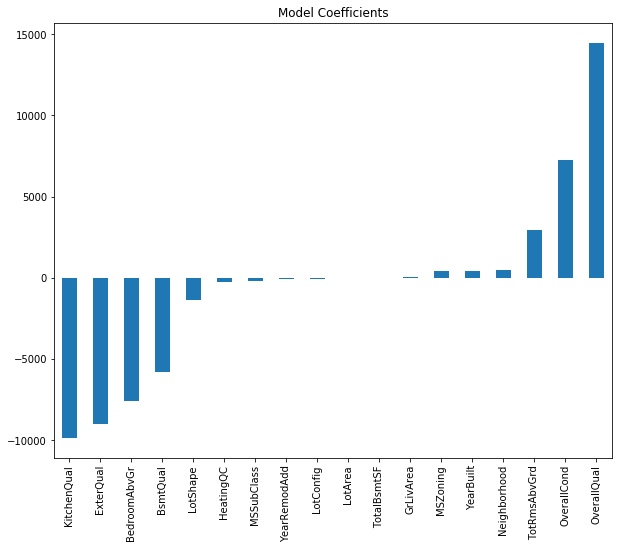

In [23]:
coef1 = pd.Series(lin_reg.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [24]:
#Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_alg = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

#Fit algorithm on data
dt_alg = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dt_alg.fit(train[predictors], train[target])

#predict training set
train_pred = dt_alg.predict(train[predictors])

cv_results = cross_val_score(dt_alg, train[predictors], train[target], cv=kf, scoring='mean_squared_error', n_jobs=-1)
cv_score = np.sqrt(np.abs(cv_results))

 #Print model report:
print ('\nModel Report')
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, train_pred)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
print("Score: ", dt_alg.score(train[predictors], train[target]))


Model Report
RMSE : 4.218e+04
CV Score : Mean - 4.419e+04 | Std - 4470 | Min - 3.852e+04 | Max - 5.421e+04
Score:  0.717931827211


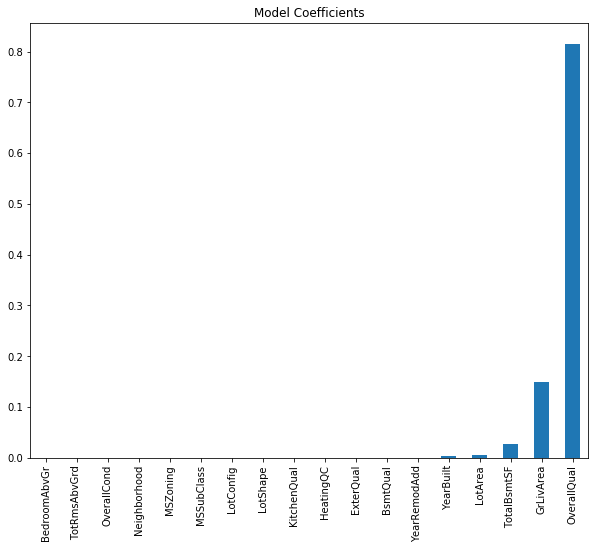

In [26]:
coef1 = pd.Series(dt_alg.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [27]:
df.columns

Index(['GrLivArea', 'Id', 'LotArea', 'SalePrice', 'TotalBsmtSF', 'source',
       'BedroomAbvGr_0', 'BedroomAbvGr_1', 'BedroomAbvGr_2', 'BedroomAbvGr_3',
       ...
       'YearRemodAdd_2001', 'YearRemodAdd_2002', 'YearRemodAdd_2003',
       'YearRemodAdd_2004', 'YearRemodAdd_2005', 'YearRemodAdd_2006',
       'YearRemodAdd_2007', 'YearRemodAdd_2008', 'YearRemodAdd_2009',
       'YearRemodAdd_2010'],
      dtype='object', length=299)